In [24]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import joblib
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


## ETL on Pokemon Dataset

In [25]:
# Read in Pokemon CSV
pokemon_df = pd.read_csv("Resources/pokemon.csv")
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
4,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False


In [26]:
# Remove all "Mega" Pokemon from the dataset
pokemon_df = pokemon_df[~pokemon_df.Name.str.contains("Mega ")]
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
4,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False


In [27]:
# Convert bool in "Legendary" to int
pokemon_df["Legendary"] = pokemon_df["Legendary"].astype(int)
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0
3,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,0
4,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,0


In [28]:
# Fill all null values in the "Type 2" columns with "None"
pokemon_df.fillna("None", inplace=True)
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0
3,5,Charmander,Fire,None,39,52,43,60,50,65,1,0
4,6,Charmeleon,Fire,None,58,64,58,80,65,80,1,0


In [29]:
# List of all mythical Pokemon
mythicals = ["Mew", "Celebi", "Jirachi", "Deoxys", "Manaphy", "Phione", "Darkrai", "Shaymin", "Arceus",
             "Victini", "Keldeo", "Meloetta", "Genesect", "Diancie", "Hoopa", "Volcanion"]

# Create new column "Mythical" and assign 1 to all mythical Pokemon
pokemon_df["Mythical"] = 0
for index, row in pokemon_df.iterrows():
    for name in mythicals:
        if row["Name"] == name:
            pokemon_df.loc[index, "Mythical"] = 1

pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mythical
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0
3,5,Charmander,Fire,None,39,52,43,60,50,65,1,0,0
4,6,Charmeleon,Fire,None,58,64,58,80,65,80,1,0,0


In [30]:
# Reorder columns
pokemon_df = pokemon_df[["#", "Name", "Type 1", "Type 2", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Mythical", "Legendary"]]
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Mythical,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0
3,5,Charmander,Fire,None,39,52,43,60,50,65,1,0,0
4,6,Charmeleon,Fire,None,58,64,58,80,65,80,1,0,0


In [31]:
# Save to new CSV
pokemon_df.to_csv("static/data/pokemon_etl.csv", index=False)

## ETL on Joined Pokemon_Combats dataset
This is done after joining the datasets in etl.sql

In [9]:
#  Read the pokemon_combats.csv
pokemon_combats_df = pd.read_csv("Resources/pokemon_combats.csv")
pokemon_combats_df.head()

,match_id,first,first_name,first_type_1,first_type_2,first_hp,first_attack,first_defense,first_sp_atk,first_sp_def,...,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,second_generation,second_mythical,second_legendary,winner
0,1,266,Larvitar,Rock,Ground,50,64,50,45,50,...,70,70,40,60,40,60,3,0,0,298
1,2,702,Virizion,Grass,Fighting,91,90,72,90,129,...,91,129,90,72,90,108,5,0,1,701
2,3,191,Togetic,Fairy,Flying,55,40,85,80,105,...,75,75,75,125,95,40,5,0,0,668
3,4,237,Slugma,Fire,NaN,40,40,40,70,40,...,77,120,90,60,90,48,5,0,0,683
4,5,151,Omastar,Rock,Water,70,60,125,115,70,...,20,10,230,10,230,5,2,0,0,151


In [10]:
# Transform the winner column to work as our target
# 0 = first Pokemon won, 1 = second Pokemon won
for index, row in pokemon_combats_df.iterrows():
    if row["winner"] == row["first"]:
        pokemon_combats_df.loc[index, "winner"] = 0
    elif row["winner"] == row["second"]:
        pokemon_combats_df.loc[index, "winner"] = 1

pokemon_combats_df.head()

,match_id,first,first_name,first_type_1,first_type_2,first_hp,first_attack,first_defense,first_sp_atk,first_sp_def,...,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,second_generation,second_mythical,second_legendary,winner
0,1,266,Larvitar,Rock,Ground,50,64,50,45,50,...,70,70,40,60,40,60,3,0,0,1
1,2,702,Virizion,Grass,Fighting,91,90,72,90,129,...,91,129,90,72,90,108,5,0,1,1
2,3,191,Togetic,Fairy,Flying,55,40,85,80,105,...,75,75,75,125,95,40,5,0,0,1
3,4,237,Slugma,Fire,NaN,40,40,40,70,40,...,77,120,90,60,90,48,5,0,0,1
4,5,151,Omastar,Rock,Water,70,60,125,115,70,...,20,10,230,10,230,5,2,0,0,0


In [11]:
# Drop columns that are unnecessary for our model
pokemon_combats_df.drop(["match_id", "first", "first_name", "first_generation", "second", "second_name", "second_generation"], axis=1, inplace=True)
pokemon_combats_df.head()

,first_type_1,first_type_2,first_hp,first_attack,first_defense,first_sp_atk,first_sp_def,first_speed,first_mythical,first_legendary,...,second_type_2,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,second_mythical,second_legendary,winner
0,Rock,Ground,50,64,50,45,50,41,0,0,...,Dark,70,70,40,60,40,60,0,0,1
1,Grass,Fighting,91,90,72,90,129,108,0,1,...,Fighting,91,129,90,72,90,108,0,1,1
2,Fairy,Flying,55,40,85,80,105,40,0,0,...,NaN,75,75,75,125,95,40,0,0,1
3,Fire,NaN,40,40,40,70,40,20,0,0,...,NaN,77,120,90,60,90,48,0,0,1
4,Rock,Water,70,60,125,115,70,55,0,0,...,Rock,20,10,230,10,230,5,0,0,0


In [12]:
# Fill all null values in the "Type 2" columns with "None"
pokemon_combats_df.fillna("None", inplace=True)
pokemon_combats_df.head()

,first_type_1,first_type_2,first_hp,first_attack,first_defense,first_sp_atk,first_sp_def,first_speed,first_mythical,first_legendary,...,second_type_2,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,second_mythical,second_legendary,winner
0,Rock,Ground,50,64,50,45,50,41,0,0,...,Dark,70,70,40,60,40,60,0,0,1
1,Grass,Fighting,91,90,72,90,129,108,0,1,...,Fighting,91,129,90,72,90,108,0,1,1
2,Fairy,Flying,55,40,85,80,105,40,0,0,...,None,75,75,75,125,95,40,0,0,1
3,Fire,None,40,40,40,70,40,20,0,0,...,None,77,120,90,60,90,48,0,0,1
4,Rock,Water,70,60,125,115,70,55,0,0,...,Rock,20,10,230,10,230,5,0,0,0


In [13]:
# Create corresponding type list and matrix of type matchups
types = ["Normal", "Fire", "Water", "Electric", "Grass", "Ice", "Fighting", "Poison",
         "Ground", "Flying", "Psychic", "Bug", "Rock", "Ghost", "Dragon", "Dark", "Steel", "Fairy"]
type_chart = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 0, 1, 1, 0.5, 1],
              [1, 0.5, 0.5, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0.5, 1, 0.5, 1, 2, 1],
              [1, 2, 0.5, 1, 0.5, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0.5, 1, 1, 1],
              [1, 1, 2, 0.5, 0.5, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0.5, 1, 1, 1],
              [1, 0.5, 2, 1, 0.5, 1, 1, 0.5, 2, 0.5, 1, 0.5, 2, 1, 0.5, 1, 0.5, 1],
              [1, 0.5, 0.5, 1, 2, 0.5, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0.5, 1],
              [2, 1, 1, 1, 1, 2, 1, 0.5, 1, 0.5, 0.5, 0.5, 2, 0, 1, 2, 2, 0.5],
              [1, 1, 1, 1, 2, 1, 1, 0.5, 0.5, 1, 1, 1, 0.5, 0.5, 1, 1, 0, 2],
              [1, 2, 1, 2, 0.5, 1, 1, 2, 1, 0, 1, 0.5, 2, 1, 1, 1, 2, 1],
              [1, 1, 1, 0.5, 2, 1, 2, 1, 1, 1, 1, 2, 0.5, 1, 1, 1, 0.5, 1],
              [1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0.5, 1, 1, 1, 1, 0, 0.5, 1],
              [1, 0.5, 1, 1, 2, 1, 0.5, 0.5, 1, 0.5, 2, 1, 1, 0.5, 1, 2, 0.5, 0.5],
              [1, 2, 1, 1, 1, 2, 0.5, 1, 0.5, 2, 1, 2, 1, 1, 1, 1, 0.5, 1],
              [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0.5, 1, 1],
              [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0.5, 0],
              [1, 1, 1, 1, 1, 1, 0.5, 1, 1, 1, 2, 1, 1, 2, 1, 0.5, 1, 0.5],
              [1, 0.5, 0.5, 0.5, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0.5, 2],
              [1, 0.5, 1, 1, 1, 1, 2, 0.5, 1, 1, 1, 1, 1, 1, 2, 2, 0.5, 1]]

# Create new columns to show overall "effectiveness" against opponent Pokemon
pokemon_combats_df["first_effectiveness"] = 1.0
pokemon_combats_df["second_effectiveness"] = 1.0      

# For each matchup, get each Pokemon types and sum their effectiveness
# The higher the number, the more "effective" that Pokemon is against its opponent
for index, row in pokemon_combats_df.iterrows():
    if row["first_type_2"] == "None":
        first_types = [row["first_type_1"]]
    else:
        first_types = [row["first_type_1"], row["first_type_2"]]

    if row["second_type_2"] == "None":
        second_types = [row["second_type_1"]]
    else:
        second_types = [row["second_type_1"], row["second_type_2"]]

    for first_type in first_types:
        for second_type in second_types:
            first_effectiveness = type_chart[types.index(first_type)][types.index(second_type)]
            second_effectiveness = type_chart[types.index(second_type)][types.index(first_type)]

            if not first_effectiveness == 0:
                pokemon_combats_df.loc[index, "first_effectiveness"] = pokemon_combats_df.loc[index, "first_effectiveness"] * first_effectiveness

            if not second_effectiveness == 0:
                pokemon_combats_df.loc[index, "second_effectiveness"] = pokemon_combats_df.loc[index, "second_effectiveness"] * second_effectiveness

            #pokemon_combats_df.loc[index, "first_effectiveness"] += first_effectiveness
            #pokemon_combats_df.loc[index, "second_effectiveness"] += second_effectiveness


pokemon_combats_df.head()

,first_type_1,first_type_2,first_hp,first_attack,first_defense,first_sp_atk,first_sp_def,first_speed,first_mythical,first_legendary,...,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,second_mythical,second_legendary,winner,first_effectiveness,second_effectiveness
0,Rock,Ground,50,64,50,45,50,41,0,0,...,70,40,60,40,60,0,0,1,0.5,4.0
1,Grass,Fighting,91,90,72,90,129,108,0,1,...,129,90,72,90,108,0,1,1,4.0,0.5
2,Fairy,Flying,55,40,85,80,105,40,0,0,...,75,75,125,95,40,0,0,1,1.0,1.0
3,Fire,None,40,40,40,70,40,20,0,0,...,120,90,60,90,48,0,0,1,0.5,1.0
4,Rock,Water,70,60,125,115,70,55,0,0,...,10,230,10,230,5,0,0,0,4.0,1.0


In [14]:
# Drop the now unecessary type columns
pokemon_combats_df.drop(["first_type_1", "first_type_2", "second_type_1", "second_type_2"], axis=1, inplace=True)
pokemon_combats_df.head()

,first_hp,first_attack,first_defense,first_sp_atk,first_sp_def,first_speed,first_mythical,first_legendary,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,second_mythical,second_legendary,winner,first_effectiveness,second_effectiveness
0,50,64,50,45,50,41,0,0,70,70,40,60,40,60,0,0,1,0.5,4.0
1,91,90,72,90,129,108,0,1,91,129,90,72,90,108,0,1,1,4.0,0.5
2,55,40,85,80,105,40,0,0,75,75,75,125,95,40,0,0,1,1.0,1.0
3,40,40,40,70,40,20,0,0,77,120,90,60,90,48,0,0,1,0.5,1.0
4,70,60,125,115,70,55,0,0,20,10,230,10,230,5,0,0,0,4.0,1.0


In [15]:
# Reorder columns
pokemon_combats_df = pokemon_combats_df[["first_effectiveness", "first_hp", "first_attack", "first_defense", "first_sp_atk", "first_sp_def", "first_speed", "first_mythical", "first_legendary",
         "second_effectiveness", "second_hp", "second_attack", "second_defense", "second_sp_atk", "second_sp_def", "second_speed", "second_mythical", "second_legendary", "winner"]]

pokemon_combats_df.head()

,first_effectiveness,first_hp,first_attack,first_defense,first_sp_atk,first_sp_def,first_speed,first_mythical,first_legendary,second_effectiveness,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,second_mythical,second_legendary,winner
0,0.5,50,64,50,45,50,41,0,0,4.0,70,70,40,60,40,60,0,0,1
1,4.0,91,90,72,90,129,108,0,1,0.5,91,129,90,72,90,108,0,1,1
2,1.0,55,40,85,80,105,40,0,0,1.0,75,75,75,125,95,40,0,0,1
3,0.5,40,40,40,70,40,20,0,0,1.0,77,120,90,60,90,48,0,0,1
4,4.0,70,60,125,115,70,55,0,0,1.0,20,10,230,10,230,5,0,0,0


In [16]:
# Save to new CSV
pokemon_combats_df.to_csv("Resources/pokemon_combats_etl.csv", index=False)

In [17]:
# Split our preprocessed data into our features and target arrays
X = pokemon_combats_df.drop("winner", axis=1)
y = pokemon_combats_df["winner"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Random Forest

In [19]:
# Create the random forest classifier instance
# Fit the model
model = RandomForestClassifier(n_estimators=500, random_state=78).fit(X_train_scaled, y_train)

In [20]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [21]:
# Create the random forest classifier instance
# Fit the model
import time
start_time = time.time()
model = RandomForestClassifier(n_estimators=500, random_state=78).fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(f"Precision: {precision_score(y_test, predictions)}")
print(f"Recall: {recall_score(y_test, predictions)}")
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.9502066522338123
Precision: 0.9595408355287919
Recall: 0.9460111317254174


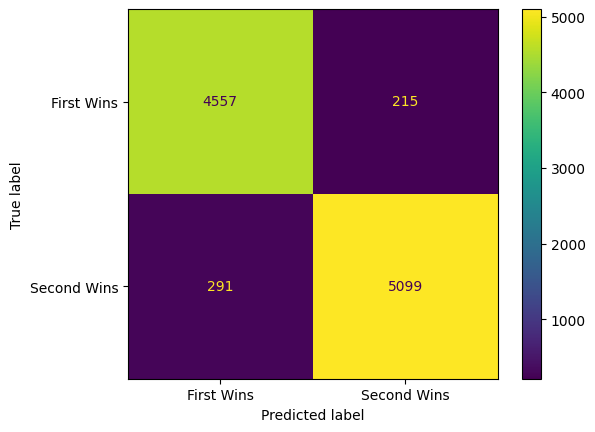

In [22]:
# Displaying results
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predictions), display_labels=["First Wins", "Second Wins"])
disp.plot()

In [ ]:
# Save the model
joblib.dump(model, "random_forest.joblib")